# Basic Usage

https://www.tensorflow.org/get_started/basic_usage
To use TensorFlow you need to understand how TensorFlow:
Represents computations as graphs.
Executes graphs in the context of Sessions.
Represents data as tensors.
Maintains state with Variables.
Uses feeds and fetches to get data into and out of arbitrary operations.


TensorFlow is a programming system in which you represent computations as graphs.
Nodes in the graph are called ops (short for operations).
An op takes zero or more Tensors, performs some computation, and produces zero or more Tensors.
In TensorFlow terminology, a Tensor is a typed multi-dimensional array. For example, you can represent a mini-batch of images as a 4-D array of floating point numbers with dimensions [batch, height, width, channels].

A TensorFlow graph is a description of computations. To compute anything, a graph must be launched in a Session. A Session places the graph ops onto Devices, such as CPUs or GPUs, and provides methods to execute them. These methods return tensors produced by ops as numpy ndarray objects in Python, and as tensorflow::Tensor instances in C and C++.


Tutorials taken from "Hello, Tensorflow" by Aaron Schumacher, 2016 and "Getting started with TensorFlow" by Giancarlo Zaccone, 2016.

## The simplest TensorFlow graph
Tutorial taken from "Hello, Tensorflow" by Aaron Schumacher, 2016.
First, we import tensorflow, and abbreviate it as "tf" for short.

In [81]:
import tensorflow as tf

There is already an implicit default graph.

In [82]:
graph = tf.get_default_graph()

"Nodes in the graph are called ops (short for operations)."

In [3]:
graph.get_operations()

[]

Currently there isn't anything in the graph, but we'll put something in the graph. Let's first create a simple constant input value of 1.

In [4]:
input_value = tf.constant(1.0)

That constant now lives in a node, an operation, in the graph. The Python variable name "input_value" refers indirectly to that operation, but we can also find the operation in the default graph.

In [5]:
operations = graph.get_operations()
operations

In [23]:
operations[0].node_def

name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
      }
      float_val: 1.0
    }
  }
}

We can also evaluate "input_value", but doing so the usual way only gives us the following information.

In [6]:
input_value

<tf.Tensor 'Const:0' shape=() dtype=float32>

"input_value" is a constant 32-bit float tensor of no dimension, it is just a number, but this doesn't tell us what the number is. In order to evaluate "input_value" to get its numerical value, we need to create a "session".
"To compute anything, a graph must be launched in a Session. A Session places the graph ops onto Devices, such as CPUs or GPUs, and provides methods to execute them."

In [7]:
sess = tf.Session()
sess.run(input_value)

1.0

## The simplest TensorFlow neuron
Let's build a neuron with just 1 parameter, or weight. The neuron's weight is not going to be a constant, it will change to learn based on the input and output we use for training. The weight will be a TensorFlow variable (tf.Variable class).
We first create this variable by passing a Tensor as its initial value to the Variable() constructor.

In [8]:
weight = tf.Variable(0.8)
weight

The initial value of this "weight" variable is 0.8.
How many operations does this variable add to the default graph?

In [9]:
for op in graph.get_operations():
    print(op.name)

Const
Variable/initial_value
Variable
Variable/Assign
Variable/read


There are 4 operations for adding this variable:
Const_4
Variable/initial_value
Variable
Variable/Assign
Variable/read

Let's add a real computation operation to the graph.

In [10]:
output_value = weight * input_value

Now we can see the last operation is that multiplication.

In [11]:
op = graph.get_operations()[-1]
op.name

'mul'

Can you guess what we try to achieve in the following code?

In [12]:
for op_input in op.inputs:
    print(op_input)

Tensor("Variable/read:0", shape=(), dtype=float32)
Tensor("Const:0", shape=(), dtype=float32)


The multiplication operation tracks where its inputs come from (other operations in the graph). Imagine as the graph grows in size, it would become really hard to keep track of their relationship without having a tool to visualize the whole graph.  [TensorBoard graph visualization](https://www.tensorflow.org/how_tos/graph_viz/) is designed to help.

How to find out the result of this multiplication? We need the "session" to "run" the "output_value" operation.

In [13]:
sess.run(output_value)

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable)]]

Caused by op 'Variable/read', defined at:
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-ca874799b476>", line 1, in <module>
    weight = tf.Variable(0.8)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\vumin\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable)]]


But we got this error instead of the result: "FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_2". It turns out that the operation requires the variable "weight". Even though we had initialized this variable, its value hasn't yet been set in the current session. The tf.global_variables_initializer() function will generate an operation that initializes all our variables (in this case just one, "weight").

In [83]:
#init = tf.initialize_all_variables()        # Deprecated since 2017-03-02
init = tf.global_variables_initializer()

Don't forget to run this "init" operation.

In [84]:
sess.run(init)

Now we can run the "output_value" operation.

In [16]:
sess.run(output_value)

0.80000001

Wonder why the result of 0.8\*1.0 is not exactly 0.8?

## See your graph in TensorBoard

This tool helps visualize your graph in a nice diagram.
First create a FileWriter with the name of the output directory "log_simple_graph", and of course the graph itself.

In [40]:
file_writer = tf.summary.FileWriter("log_simple_graph", sess.graph)

Now come back to the command line and start up the TensorBoard.

In [41]:
#(C:Anaconda3) D:\MaSSP\track_2>ls
#Tutorial 1 - Overview.ipynb  data  log_simple_graph

#(C:Anaconda3) D:\MaSSP\track_2>activate tensorflow

#(tensorflow) D:\MaSSP\track_2>tensorboard --logdir=log_simple_graph
#WARNING:tensorflow:Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
#WARNING:tensorflow:Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
#Starting TensorBoard b'39' on port 6006
#(You can navigate to http://10.0.0.5:6006)

Note that a directory "log_simple_graph" is created, and a URL is given to show the diagram.

![log_simple_graph](https://github.com/chauvm/tensorflow_tutorials/raw/master/images/log_simple_graph.png "TensorBoard's diagram of our graph")


Note that an operation has its name field that is different from the Python variable name (you won't see "output_value", "input_value" in the graph, but "Const_1" or "Variable_2" instead). We should name the operations to make them show up better in the graph.

In [42]:
x = tf.constant(1.0, name="input")
w = tf.Variable(0.8, name="weight")
y = tf.mul(w, x, name="output")

In [43]:
file_writer_2 = tf.summary.FileWriter("log_simple_graph_2", sess.graph)

Now restart TensorBoard with "log_simple_graph_2", and refresh the page.

In [ ]:
#(tensorflow) D:\MaSSP\track_2>ls
#Tutorial 1 - Overview.ipynb  data  log_simple_graph  log_simple_graph_2

#(tensorflow) D:\MaSSP\track_2>tensorboard --logdir=log_simple_graph_2
#Starting TensorBoard b'39' on port 6006
#(You can navigate to http://10.0.0.5:6006)

We see the operation names in the graph.
![log_simple_graph_2](https://github.com/chauvm/tensorflow_tutorials/raw/master/images/named_vars.png "TensorBoard's diagram of our graph")

## Simple image processing

Tutorial taken from "Getting started with TensorFlow" by Giancarlo Zaccone, 2016.

We will use basic operations in TensorFlow and matplotlib to manipulate the MaSSP logo.

First, import necessary modules from matplotlib.

In [2]:
import matplotlib.image as mp_image

And load the MaSSP logo into an array.

In [5]:
massp_img = "../../images/massp_cover.png"
input_image = mp_image.imread(massp_img)

What are the dimension and shape of this image? Describe the image based on the answers.

In [7]:
# answer



Next, we use matplotlib to plot the image.

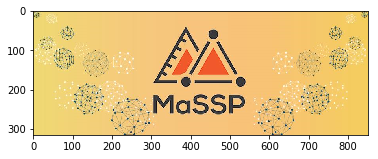

In [21]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

In [49]:
print(input_image)

[[[ 0.93725491  0.83529413  0.47058824  1.        ]
  [ 0.95294118  0.8509804   0.50980395  1.        ]
  [ 0.94509804  0.8392157   0.56078434  1.        ]
  ..., 
  [ 0.92156863  0.81568629  0.41176471  1.        ]
  [ 0.91764706  0.80000001  0.35294119  1.        ]
  [ 0.92941177  0.81176472  0.36470589  1.        ]]

 [[ 0.90196079  0.80784315  0.43137255  1.        ]
  [ 0.97254902  0.87843138  0.53333336  1.        ]
  [ 0.9137255   0.81960785  0.52941179  1.        ]
  ..., 
  [ 0.94901961  0.83529413  0.43529412  1.        ]
  [ 0.94117647  0.81960785  0.36470589  1.        ]
  [ 0.94117647  0.81176472  0.36078432  1.        ]]

 [[ 1.          0.93725491  0.5411765   1.        ]
  [ 0.86274511  0.78039217  0.41568628  1.        ]
  [ 0.94509804  0.87058824  0.56862748  1.        ]
  ..., 
  [ 0.94117647  0.80784315  0.41568628  1.        ]
  [ 0.96078432  0.81568629  0.35686275  1.        ]
  [ 0.95686275  0.80392158  0.34509805  1.        ]]

 ..., 
 [[ 0.93725491  0.8509804  

How to remove the last column that contains all ones?

In [91]:
# code


How to crop out MaSSP logo only?

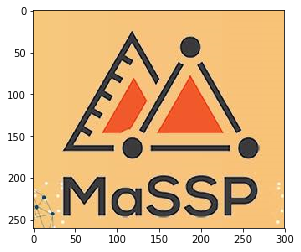

In [101]:
# code


If the 3-d array of the logo is "transposed", how does the resulting image look like? Verify by plotting the transposed image.

In [ ]:
# transpose and print the resulting array

# plot the "transposed" logo